# Create HRRR Four-Panel Plots using Herbie
This notebook will allow us to plot four-panel upper-air plots using HRRR model data.  

In [1]:
#Import Modules
from herbie import Herbie
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
import imageio.v2 as imageio
from IPython.display import display, Image as IPImage

Here we will input our date and number of forecast hours.  It is usually not necessary to have a plot for every single forecast hour, as we are simply trying to see how the general synoptic pattern evolves over the course of a day or two.  We will stick with a 6-hour forecast interval.

In [2]:
yr = input('Year (yyyy):')
m = input('Month (mm):')
d = input('Day (dd):')
fxx = input('Choose the number of forecast hours (up to 48, multiple of 6):')
date = (f'{yr}-{m}-{d}')
x = np.arange(0, 1799)
y = np.arange(0, 1059)

#Create lists to feed the datasets into
fh = ['00', '06', '12', '18', '24', '30', '36', '42', '48']
H = []
ds = []

#Create a looping statement that will read in all the data for each forecast hour
for a in range(0, int(fxx) + 1, 6):
    

    #Read in the data
    H.append(Herbie(f"{yr}-{m}-{d}",  # model run date
        model="hrrr",  # model name
        product= 'prs', #product
        fxx=a,  # forecast lead time
              ))

for b in range(0, int(int(fxx)/6) + 1):
    ds.append(xr.Dataset(
        data_vars=dict(
            gh850 = (["y", "x"], H[b].xarray(f":850 mb:", remove_grib=False).gh.values),
            gh700 = (["y", "x"], H[b].xarray(f":700 mb:", remove_grib=False).gh.values),
            gh500 = (["y", "x"], H[b].xarray(f":500 mb:", remove_grib=False).gh.values),
            gh300 = (["y", "x"], H[b].xarray(f":300 mb:", remove_grib=False).gh.values),
            u850 = (["y", "x"], H[b].xarray(f":850 mb:", remove_grib=False).u.values*1.9438),
            v850 = (["y", "x"], H[b].xarray(f":850 mb:", remove_grib=False).v.values*1.9438),
            u700 = (["y", "x"], H[b].xarray(f":700 mb:", remove_grib=False).u.values*1.9438),
            v700 = (["y", "x"], H[b].xarray(f":700 mb:", remove_grib=False).v.values*1.9438),
            u500 = (["y", "x"], H[b].xarray(f":500 mb:", remove_grib=False).u.values*1.9438),
            v500 = (["y", "x"], H[b].xarray(f":500 mb:", remove_grib=False).v.values*1.9438),
            u300 = (["y", "x"], H[b].xarray(f":300 mb:", remove_grib=False).u.values*1.9438),
            v300 = (["y", "x"], H[b].xarray(f":300 mb:", remove_grib=False).v.values*1.9438),
            t850 = (["y", "x"], H[b].xarray(f":850 mb:", remove_grib=False).t.values-273),
            r700 = (["y", "x"], H[b].xarray(f":700 mb:", remove_grib=False).r.values),
            absv500 = (["y", "x"], H[b].xarray(f":500 mb:", remove_grib=False).absv.values),
        ),
        coords=dict(
                longitude = (["y", "x"], H[b].xarray(f":850 mb:", remove_grib=False).longitude.values),
                latitude = (["y", "x"], H[b].xarray(f":850 mb:", remove_grib=False).latitude.values),
                valid_time = (H[b].xarray(f":850 mb:", remove_grib=False).valid_time.values),
                step = (H[b].xarray(f":850 mb:", remove_grib=False).step.values))  
    ))
    ds[b]['wspd300'] = (["y", "x"], (mpcalc.wind_speed(ds[b].u300.values*units.knot, ds[b].v300.values*units.knot)).m)

Year (yyyy): 2024
Month (mm): 04
Day (dd): 25
Choose the number of forecast hours (up to 48, multiple of 6): 24


✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F12 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F18 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-25 00:00 UTC F24 ┊ GRIB2 @ aws ┊ IDX @ aws


Now that we read in our data, let's see what we have:

In [3]:
ds[0]

<xarray.Dataset> Size: 152MB
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    longitude   (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.0 299.1
    latitude    (y, x) float64 15MB 21.14 21.15 21.15 ... 47.86 47.85 47.84
    valid_time  datetime64[ns] 8B 2024-04-25
    step        timedelta64[ns] 8B 00:00:00
Dimensions without coordinates: y, x
Data variables: (12/16)
    gh850       (y, x) float32 8MB 1.535e+03 1.535e+03 ... 1.362e+03 1.361e+03
    gh700       (y, x) float32 8MB 3.168e+03 3.168e+03 ... 2.91e+03 2.911e+03
    gh500       (y, x) float32 8MB 5.863e+03 5.863e+03 ... 5.491e+03 5.492e+03
    gh300       (y, x) float32 8MB 9.62e+03 9.62e+03 ... 9.098e+03 9.099e+03
    u850        (y, x) float32 8MB -2.01 -1.889 -1.889 ... 8.316 8.316 8.316
    v850        (y, x) float32 8MB -5.106 -4.984 -4.863 ... 1.697 1.819 1.94
    ...          ...
    u300        (y, x) float32 8MB 74.32 74.32 74.19 ... -3.679 -3.436 -3.071
    v300        (y, x) float32 8MB 12.03 12.03 12.03 11.91 ... 54.07 53.7 53.22
    t850        (y, x) float32 8MB 16.66 16.66 16.66 16.66 ... 2.909 2.971 2.971
    r700        (y, x) float32 8MB 23.05 23.05 23.05 23.05 ... 34.3 34.8 35.3
    absv500     (y, x) float32 8MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    wspd300     (y, x) float32 8MB 75.28 75.28 75.16 75.14 ... 54.19 53.81 53.31

It is important that we downsample the data to allow our plots to generate quicker and make them easier to read:

In [4]:
#Create lists for the downsampled data
t850_ds = []
u850_ds = []
v850_ds = []
u850_barbs = []
v850_barbs = []
r700_ds = []
u700_ds = []
v700_ds = []
u700_barbs = []
v700_barbs = []
absv500_ds = []
u500_ds = []
v500_ds = []
u500_barbs = []
v500_barbs = []
wspd300_ds = []
u300_ds = []
v300_ds = []
u300_barbs = []
v300_barbs = []
lon_barbs = []
lat_barbs = []
gh850_ds = []
gh700_ds = []
gh500_ds = []
gh300_ds = []

interval = 20
#Further downsample the wind barbs to cut down on overlap
barb_interval = 4
length = 5.5

#Create the downsample function
def downsample_data(data, interval):
    return data[::interval, ::interval]
lon_ds = downsample_data(ds[0].longitude, interval)
lat_ds = downsample_data(ds[0].latitude, interval) 

#Fill in the other lists with the downsampled data
for b in range(0, int(int(fxx)/6) + 1):
    t850_ds.append(downsample_data(ds[b]['t850'], interval))
    u850_ds.append(downsample_data(ds[b].u850, interval))
    v850_ds.append(downsample_data(ds[b].v850, interval))
    u850_barbs.append(downsample_data(u850_ds[b], barb_interval))
    v850_barbs.append(downsample_data(v850_ds[b], barb_interval))
    r700_ds.append(downsample_data(ds[b]['r700'], interval))
    u700_ds.append(downsample_data(ds[b].u700, interval))
    v700_ds.append(downsample_data(ds[b].v700, interval))
    u700_barbs.append(downsample_data(u700_ds[b], barb_interval))
    v700_barbs.append(downsample_data(v700_ds[b], barb_interval))
    absv500_ds.append(downsample_data(ds[b]['absv500'], interval))
    u500_ds.append(downsample_data(ds[b].u500, interval))
    v500_ds.append(downsample_data(ds[b].v500, interval))
    u500_barbs.append(downsample_data(u500_ds[b], barb_interval))
    v500_barbs.append(downsample_data(v500_ds[b], barb_interval))
    wspd300_ds.append(downsample_data(ds[b]['wspd300'], interval))
    u300_ds.append(downsample_data(ds[b].u300, interval))
    v300_ds.append(downsample_data(ds[b].v300, interval))
    u300_barbs.append(downsample_data(u300_ds[b], barb_interval))
    v300_barbs.append(downsample_data(v300_ds[b], barb_interval))
    lon_barbs.append(downsample_data(lon_ds, barb_interval))
    lat_barbs.append(downsample_data(lat_ds, barb_interval))
    gh850_ds.append(downsample_data(ds[b].gh850, interval))
    gh700_ds.append(downsample_data(ds[b].gh700, interval))
    gh500_ds.append(downsample_data(ds[b].gh500, interval))
    gh300_ds.append(downsample_data(ds[b].gh300, interval))

lon = lon_ds
lat = lat_ds

## Plot the data
Here's where we put it all together to get our four-panel plots.

In [13]:
#We have the synoptic extent set to the full CONUS
extent = [-125, -65, 25, 47]
#WFIP3 Site Coordinates:
lat1, lon1 = 41.4456, -71.4357  #Rhode Island Radar Wind Profiler
lat2, lon2 = 41.2453, -70.105  #Nantucket Sodar
lat3, lon3 = 41.17, -71.58  #Block Island Radar Wind Profiler  
#Feel free to add or change locations if desired

#Set font size
plt.rcParams["axes.titlesize"] = '13'
plt.rcParams["xtick.labelsize"] = '12'
for b in range(0, int(int(fxx)/6) + 1):
    fig = plt.figure(1, figsize=(17, 7))
    fig.subplots_adjust(top=1, bottom=0, hspace=0.0, wspace=0.01)

    #300-hPa winds
    ax = plt.subplot(221, projection=ccrs.PlateCarree())
    ax.set_extent(extent), ccrs.PlateCarree()
    cf = ax.contourf(lon_ds, lat_ds, wspd300_ds[b], np.arange(30, 170, 10), cmap = plt.cm.BuPu)
    cs = ax.contour(lon_ds, lat_ds, gh300_ds[b], np.arange(0, 15000, 120), 
                    colors='black', transform=ccrs.PlateCarree())
    plt.clabel(cs)
    plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    ax.barbs(lon_barbs[b], lat_barbs[b], u300_barbs[b], v300_barbs[b], length = length)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.STATES.with_scale('50m'))
    #This is where we mark our locations on the map.  You can always copy and paste
    #and change the lon/lat values if you added in more sites above.  We will do this 
    #for all four maps
    ax.scatter(lon1, lat1, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax.scatter(lon2, lat2, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax.scatter(lon3, lat3, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    plt.title(f'a) Time: {date} 00 UTC HRRR FH {fh[b]} Wind Speed (kts) at 300 hPa')

    #500-hPa Absolute Vorticity
    ax2 = plt.subplot(222, projection=ccrs.PlateCarree())
    ax2.set_extent(extent), ccrs.PlateCarree()
    cf = ax2.contourf(lon_ds, lat_ds, absv500_ds[b], np.arange(-0.001, 0.00101, 0.0001), cmap = plt.cm.PuOr_r)
    cs = ax2.contour(lon_ds, lat_ds, gh500_ds[b], np.arange(0, 15000, 60), 
                    colors='black', transform=ccrs.PlateCarree())
    plt.clabel(cs)
    plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    ax2.barbs(lon_barbs[b], lat_barbs[b], u500_barbs[b], v500_barbs[b], length = length)
    ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax2.add_feature(cfeature.STATES.with_scale('50m'))
    ax2.scatter(lon1, lat1, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax2.scatter(lon2, lat2, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax2.scatter(lon3, lat3, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    plt.title(f'b) Time: {date} 00 UTC HRRR FH {fh[b]} Absolute Vorticity at 500 hPa')

    #700-hPa Relative Humidity
    ax3 = plt.subplot(223, projection=ccrs.PlateCarree())
    ax3.set_extent(extent), ccrs.PlateCarree()
    cf = ax3.contourf(lon_ds, lat_ds, r700_ds[b], np.arange(0, 101, 5), cmap = plt.cm.Greens)
    cs = ax3.contour(lon_ds, lat_ds, gh700_ds[b], np.arange(0, 15000, 30), 
                    colors='black', transform=ccrs.PlateCarree())
    plt.clabel(cs)
    plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    ax3.barbs(lon_barbs[b], lat_barbs[b], u700_barbs[b], v700_barbs[b], length = length)
    ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax3.add_feature(cfeature.STATES.with_scale('50m'))
    ax3.scatter(lon1, lat1, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax3.scatter(lon2, lat2, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax3.scatter(lon3, lat3, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    plt.title(f'c) Time: {date} 00 UTC HRRR FH {fh[b]} Relative Humidity at 700 hPa')

    #850-hPa temperature
    ax4 = plt.subplot(224, projection=ccrs.PlateCarree())
    ax4.set_extent(extent), ccrs.PlateCarree()
    cf = ax4.contourf(lon_ds, lat_ds, t850_ds[b], np.arange(-40, 41, 5), cmap = plt.cm.coolwarm)
    cs = ax4.contour(lon_ds, lat_ds, gh850_ds[b], np.arange(0, 15000, 30), 
                    colors='black', transform=ccrs.PlateCarree())
    plt.clabel(cs)
    plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)
    ax4.barbs(lon_barbs[b], lat_barbs[b], u850_barbs[b], v850_barbs[b], length = length)
    ax4.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax4.add_feature(cfeature.STATES.with_scale('50m'))
    ax4.scatter(lon1, lat1, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax4.scatter(lon2, lat2, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    ax4.scatter(lon3, lat3, 200, marker='*', color='black', transform=ccrs.PlateCarree())
    plt.title(f'd) Time: {date} 00 UTC HRRR FH {fh[b]} Temperature (C) at 850 hPa')
    plt.savefig(f'../../../Downloads/{yr}{m}{d}_4Panel_FH_{fh[b]}_HRRR.png', bbox_inches='tight', dpi=150)
    plt.close()  

## Make a Gif
Gifs are fun!  Let's make one with the plots we created (if we made more than one or two):

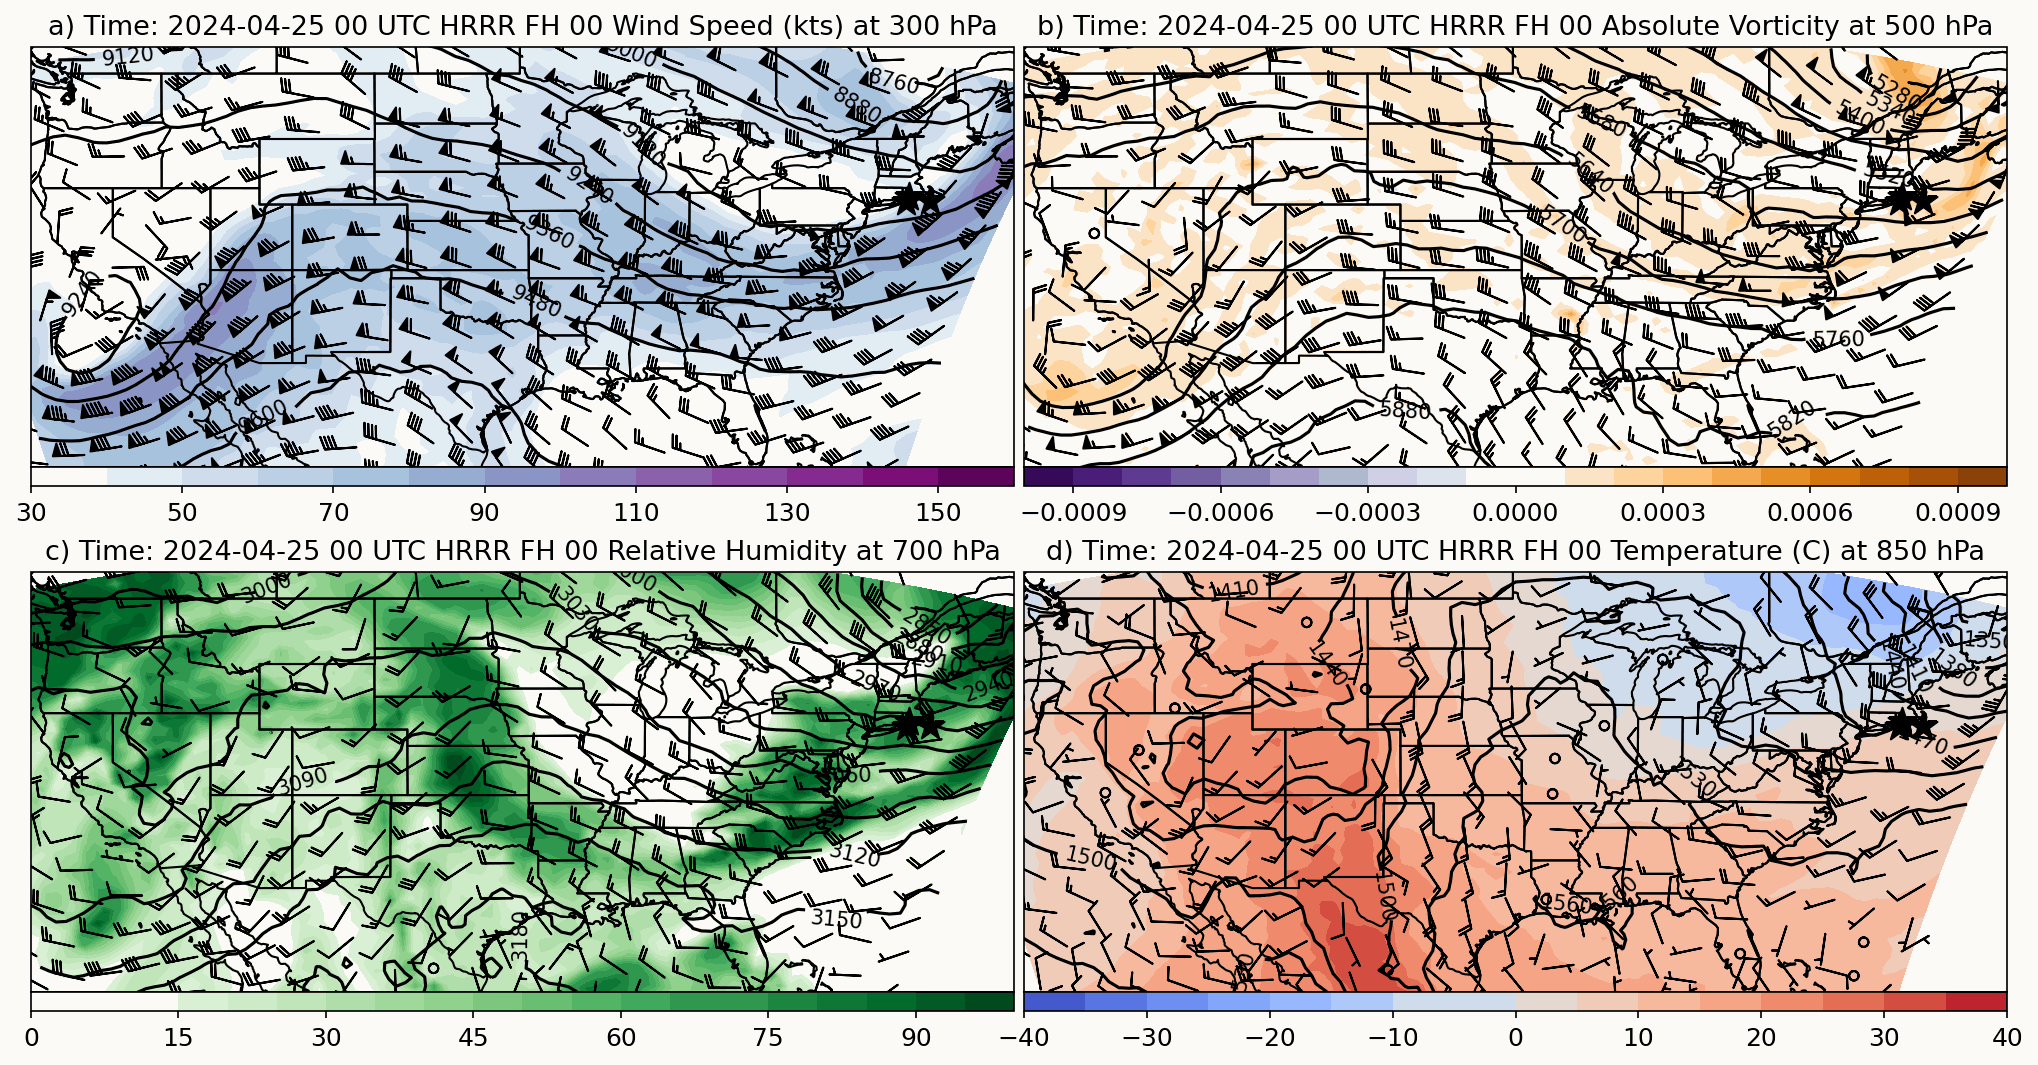

In [14]:
# List of image filenames
filenames = []
for b in range(0, int(int(fxx)/6) + 1):
    filenames.append(open(f"../../../Downloads/{yr}{m}{d}_4Panel_FH_{fh[b]}_HRRR.png", 'rb'))
    
# Create Gif
images = [imageio.imread(filename) for filename in filenames]
imageio.mimsave(f"../../../Downloads/{yr}{m}{d}_4Panel_loop_HRRR.gif", 
                images, duration=1000, loop=1000)
#Show Gif
with open(f"../../../Downloads/{yr}{m}{d}_4Panel_loop_HRRR.gif", 'rb') as f:
    display(IPImage(data=f.read(), format='gif'))